**Arbol Decisión**

In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Cargamos el dataset y mostramos las 5 primeras filas
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#1 Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc
print(data.head())
print(data.describe())
print(data.info())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

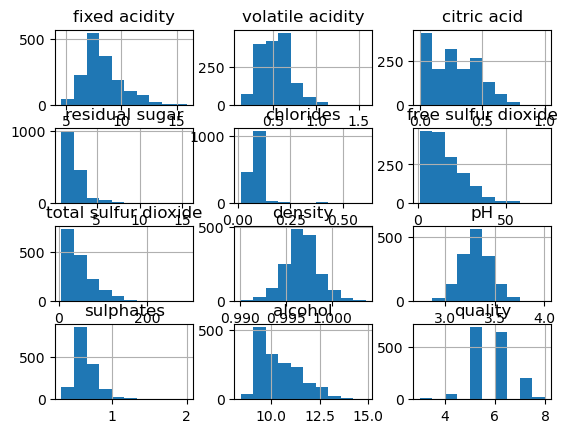

In [5]:
#Distrubuciones de variables
data.hist()
plt.show()

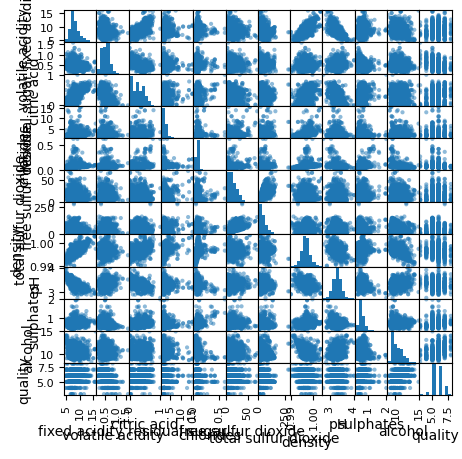

In [7]:
#Relaciones entre variables
pd.plotting.scatter_matrix(data, figsize=(5, 5))
plt.show()

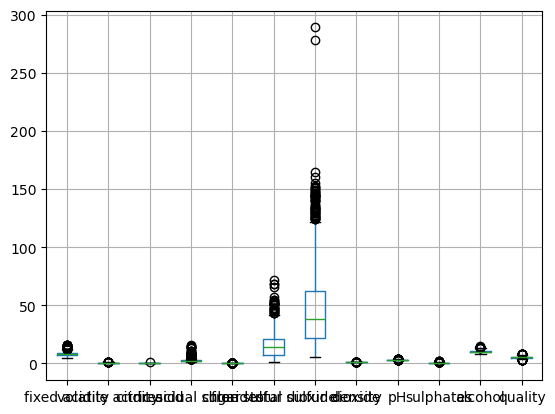

In [8]:
#Valores atipicos
data.boxplot()
plt.show()

In [19]:
# Eliminar duplicados
data = data.drop_duplicates()

# Tratar valores faltantes
data = data.dropna()

In [20]:
#Rellenar valores faltantes
data_filled = data.fillna(data.mean())

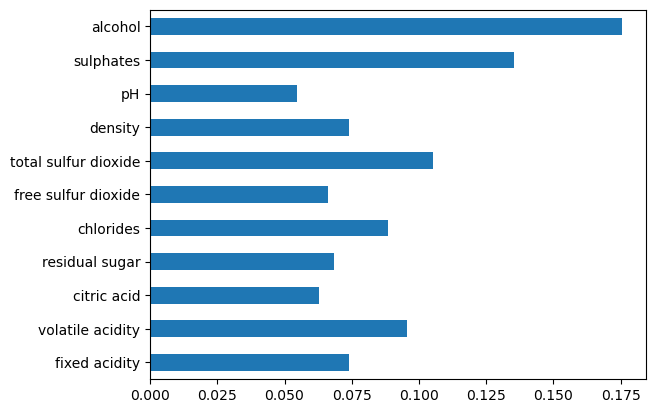

In [23]:
#Evaluemos quality
X = data.drop("quality", axis = 1)
y = data["quality"]

model = DecisionTreeClassifier()
model.fit (X,y)

#Mostrar relevancia de las caracteristicas
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.plot(kind="barh")
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
#Entrenar el modelo configurando los diferentes hiperparámetros
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
#Predicciones en el conjunto de prueba
predicciones = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

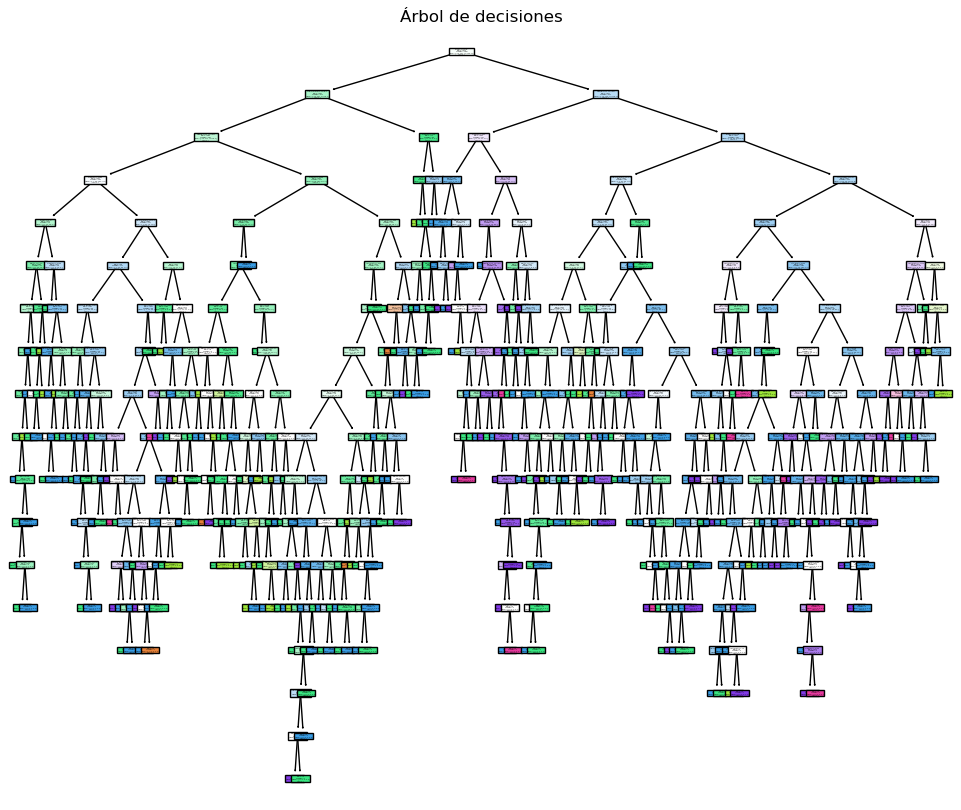

In [30]:
#Convertir clases a cadenas de texto
class_names_str = [str(c) for c in y.unique()]

#Ver el arbol de decisión
plt.figure(figsize = (12,10))
plot_tree(model, filled = True, feature_names = X.columns, class_names = class_names_str)
plt.title("Árbol de decisiones")
plt.show